# 1-Import Data

In [1]:
import pandas as pd

file_address = '/home/tumenas/Papers/ensemble/data/raw/bank/bank-additional-full.csv'
db = pd.read_csv(file_address, sep = ';') 

In [2]:
db.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Replace "Yes" and "No" answers to numeric

db['default'] = [1 if item=='yes' else 0 for item in db['default']]
db['housing'] = [1 if item=='yes' else 0 for item in db['housing']]
db['loan'] = [1 if item=='yes' else 0 for item in db['loan']]

In [4]:
db.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
db.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# Replace Nominal Variables with Dummies

db = pd.concat([db.drop('job', axis=1), pd.get_dummies(db['job'], prefix='job')], axis=1)
db = pd.concat([db.drop('marital', axis=1), pd.get_dummies(db['marital'], prefix='marital')], axis=1)
db = pd.concat([db.drop('education', axis=1), pd.get_dummies(db['education'], prefix='education')], axis=1)
db = pd.concat([db.drop('contact', axis=1), pd.get_dummies(db['contact'], prefix='contact')], axis=1)
db = pd.concat([db.drop('month', axis=1), pd.get_dummies(db['month'], prefix='month')], axis=1)
db = pd.concat([db.drop('day_of_week', axis=1), pd.get_dummies(db['day_of_week'], prefix='day_of_week')], axis=1)
db = pd.concat([db.drop('poutcome', axis=1), pd.get_dummies(db['poutcome'], prefix='poutcome')], axis=1)


In [7]:
db.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,0,261,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,0,1,0
1,57,0,0,0,149,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,0,1,0
2,37,0,1,0,226,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,0,1,0
3,40,0,0,0,151,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,0,1,0
4,56,0,0,1,307,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:xlabel='age'>

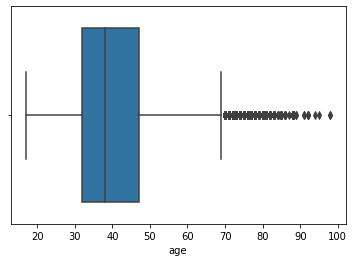

In [8]:
import seaborn as sns

sns.boxplot(db["age"])

<AxesSubplot:xlabel='age'>

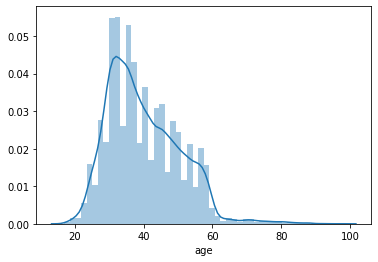

In [9]:
sns.distplot(db['age'])

<AxesSubplot:xlabel='duration'>

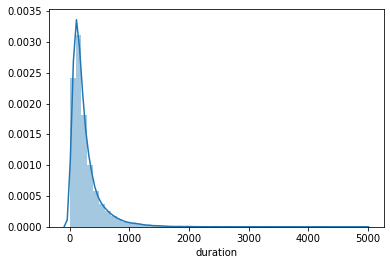

In [10]:
sns.distplot(db['duration'])

# 2- Run Models

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y = db['y']
X = db.drop('y', axis=1)

drop_list = ['job_unknown','marital_unknown','education_unknown','contact_telephone','month_dec','day_of_week_mon','poutcome_nonexistent'] 
X = X.drop(drop_list, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# standardize the continuous data
std_scale = preprocessing.StandardScaler().fit(X_train[['age', 'duration', 'pdays','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed' ]])
X_train[['age', 'duration', 'pdays','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']] = std_scale.transform(X_train[['age','duration','pdays','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']])

std_scale2 = preprocessing.StandardScaler().fit(X_test[['age', 'duration','pdays', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']])
X_test[['age', 'duration', 'pdays','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']] = std_scale2.transform(X_test[['age','duration','pdays','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']])



<ipython-input-11-589e33530ec9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['age', 'duration', 'pdays','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']] = std_scale.transform(X_train[['age','duration','pdays','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']])
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-11-589e33530ec9>:17: SettingWit

In [17]:
#######################################################
#
#               Find Best Parameters
#
#######################################################


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

kf = KFold(n_splits=10)

####################
### Best KNN parameters
####################

knn = KNeighborsClassifier()

# Parameters to be tested
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

best_knn = GridSearchCV(knn, parameters, cv= kf)
best_knn.fit(X_train,y_train)

# Best hyperparameter
print(best_knn.best_params_)

####################
### Best SVM parameters
####################

# Parameters to be tested
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'degree': [2,3,4,5]}

svc = SVC()

best_svm = GridSearchCV(svc, parameters, cv=kf)
best_svm.fit(X_train,y_train)

# Best hyperparameters
print(best_svm.best_params_)


{'n_neighbors': 19}
{'C': 3, 'degree': 2, 'kernel': 'rbf'}


In [12]:
#######################################################
#
#               Run Models
#
#######################################################

# Table with final results 
accuracy_results = pd.DataFrame(columns = ['model', 'accuracy'])

models = [
    [LogisticRegression(fit_intercept = True),'lr_sklearn'],
    [KNeighborsClassifier(n_neighbors=19),'knn'],
    [GaussianNB(),'naive_bayes'],
    [LinearDiscriminantAnalysis(),'lda'],
    [SVC(gamma=0.1, C=3.0),'svm'],
    [DecisionTreeClassifier(), 'decision_tree'],
    [RandomForestClassifier(n_estimators=200), 'random_forest'],
    [AdaBoostClassifier(n_estimators=200, random_state=0), 'adaboost'],
    [BaggingClassifier(base_estimator = DecisionTreeClassifier(), 
                          n_estimators = 200, 
                          random_state = 42), 'bagging']
]

# Function to run all models
def analisys(model, name, accuracy_results):
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    accuracy = accuracy_score(y_test,predict)
    accuracy_results = accuracy_results.append({'model':name, 'accuracy':accuracy}, ignore_index = True)                                             
    return accuracy_results

# Running all models
for item in models:
    accuracy_results = analisys(item[0],item[1], accuracy_results)
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Adding the Stacking predictor based on all other predictors (using Logistic Regression)

estimators = [
    ('lr_sklearn', LogisticRegression(fit_intercept = True)),
    ('knn', KNeighborsClassifier(n_neighbors=19)),
    ('naive_bayes', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis()),
    ('svm', SVC(gamma=0.1, C=1.0)),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier(n_estimators=10)),
    ('adaboost', AdaBoostClassifier(n_estimators=200, random_state=0)),
    ('bagging',BaggingClassifier(base_estimator = DecisionTreeClassifier(), 
                          n_estimators = 200, 
                          random_state = 42))
]    
    

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression() )
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy = accuracy_score(y_test,predict)
accuracy_results = accuracy_results.append({'model':"stacking", 'accuracy':accuracy}, ignore_index = True)                                             

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [14]:
accuracy_results

,model,accuracy
0,lr_sklearn,0.910763
1,knn,0.895608
2,naive_bayes,0.831090
3,lda,0.909439
4,svm,0.910101
5,decision_tree,0.882292
6,random_forest,0.912161
7,adaboost,0.902450
8,bagging,0.905392
9,stacking,0.909586
